In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('display.float_format', lambda x : '%.30f' % x)
sns.set()
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
pd.options.display.float_format = "{:,.3f}".format
import warnings
warnings.filterwarnings('ignore')

In [2]:
cars = pd.read_csv('CarPrice.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"13,495.000"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"16,500.000"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,"16,500.000"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,"13,950.000"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,"17,450.000"


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,103.000,0.834,98.757,174.049,65.908,53.725,"2,555.566",126.907,3.330,3.255,10.143,104.117,"5,125.122",25.220,30.751,"13,276.711"
std,59.323,1.245,6.022,12.337,2.145,2.444,520.680,41.643,0.271,0.314,3.972,39.544,476.986,6.542,6.886,"7,988.852"
min,1.000,-2.000,86.600,141.100,60.300,47.800,"1,488.000",61.000,2.540,2.070,7.000,48.000,"4,150.000",13.000,16.000,"5,118.000"
25%,52.000,0.000,94.500,166.300,64.100,52.000,"2,145.000",97.000,3.150,3.110,8.600,70.000,"4,800.000",19.000,25.000,"7,788.000"
50%,103.000,1.000,97.000,173.200,65.500,54.100,"2,414.000",120.000,3.310,3.290,9.000,95.000,"5,200.000",24.000,30.000,"10,295.000"
75%,154.000,2.000,102.400,183.100,66.900,55.500,"2,935.000",141.000,3.580,3.410,9.400,116.000,"5,500.000",30.000,34.000,"16,503.000"
max,205.000,3.000,120.900,208.100,72.300,59.800,"4,066.000",326.000,3.940,4.170,23.000,288.000,"6,600.000",49.000,54.000,"45,400.000"


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars["CarName"].value_counts()

peugeot 504                 6
toyota corona               6
toyota corolla              6
subaru dl                   4
toyota mark ii              3
                           ..
subaru r2                   1
isuzu D-Max V-Cross         1
volkswagen rabbit custom    1
toyota carina               1
renault 5 gtl               1
Name: CarName, Length: 147, dtype: int64

In [7]:
company = cars["CarName"].apply(lambda x : x.split(" ")[0])
company

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [8]:
cars.insert(2,"CompanyName",company,True)

In [9]:
del cars["CarName"]
# cars.drop(["CarName"], axis = 1, inplace = True)

In [10]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"13,495.000"
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,"16,500.000"
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,"16,500.000"
3,4,2,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,"13,950.000"
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,"17,450.000"


In [11]:
cars["CompanyName"].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
maxda           2
vw              2
renault         2
toyouta         1
mercury         1
vokswagen       1
porcshce        1
Nissan          1
Name: CompanyName, dtype: int64

In [12]:
cars["CompanyName"] = cars["CompanyName"].str.lower()

In [13]:
def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

In [14]:
replace_name("maxda","mazda")
replace_name("alfa-romero","alfa-romeo")
replace_name("toyouta","toyota")
replace_name("porcshce","porsche")
replace_name("vokswagen","volkswagen")
replace_name("vw","volkswagen")


In [15]:
len(cars["CompanyName"].value_counts())

22

In [16]:
cars["CompanyName"].value_counts()

toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
subaru        12
volkswagen    12
volvo         11
peugeot       11
dodge          9
bmw            8
buick          8
plymouth       7
audi           7
saab           6
porsche        5
isuzu          4
chevrolet      3
jaguar         3
alfa-romeo     3
renault        2
mercury        1
Name: CompanyName, dtype: int64

<AxesSubplot:title={'center':'Car Price Spread'}, ylabel='price'>

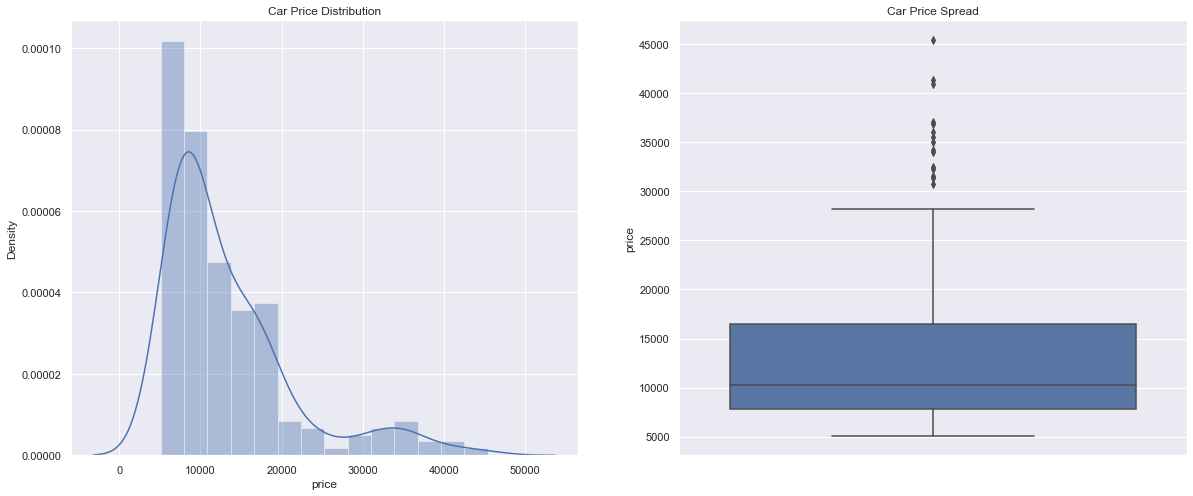

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Car Price Distribution")
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y = cars.price)


In [17]:
cars.price.describe(percentiles=(.25,0.5,.75,.85,1))

count      205.000
mean    13,276.711
std      7,988.852
min      5,118.000
25%      7,788.000
50%     10,295.000
75%     16,503.000
85%     18,500.000
100%    45,400.000
max     45,400.000
Name: price, dtype: float64

[Text(0.5, 0, 'Car Body'), Text(0, 0.5, 'Frequency Of Car Body')]

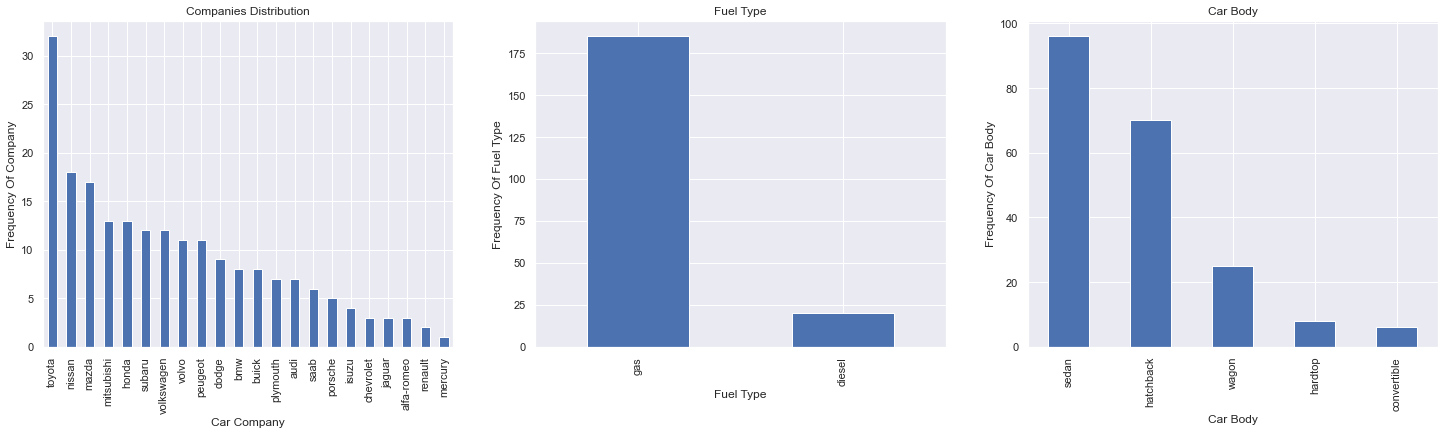

In [18]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt.title("Companies Distribution")
plt1 = cars.CompanyName.value_counts().plot(kind = "bar")
plt1.set(xlabel = "Car Company", ylabel = "Frequency Of Company")

plt.subplot(1,3,2)
plt.title("Fuel Type")
plt1 = cars.fueltype.value_counts().plot(kind = "bar")
plt1.set(xlabel = "Fuel Type", ylabel = "Frequency Of Fuel Type")


plt.subplot(1,3,3)
plt.title("Car Body")
plt1 = cars.carbody.value_counts().plot(kind = "bar")
plt1.set(xlabel = "Car Body", ylabel = "Frequency Of Car Body")



<AxesSubplot:title={'center':'Symboling vs Price'}, xlabel='symboling', ylabel='price'>

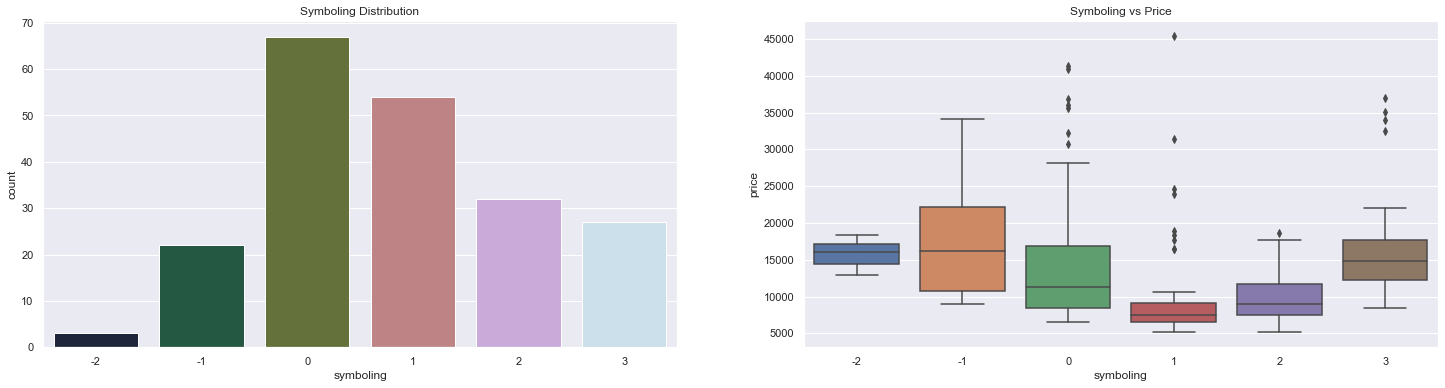

In [19]:
plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
plt.title("Symboling Distribution")
sns.countplot(cars.symboling, palette=("cubehelix"))
plt1.set(xlabel = "Symboling", ylabel = "Frequency Of Symboling")

plt.subplot(1,2,2)
plt.title("Symboling vs Price")
sns.boxplot(x = cars.symboling, y = cars.price)


<AxesSubplot:title={'center':'Engine Type vs Price'}, xlabel='enginetype', ylabel='price'>

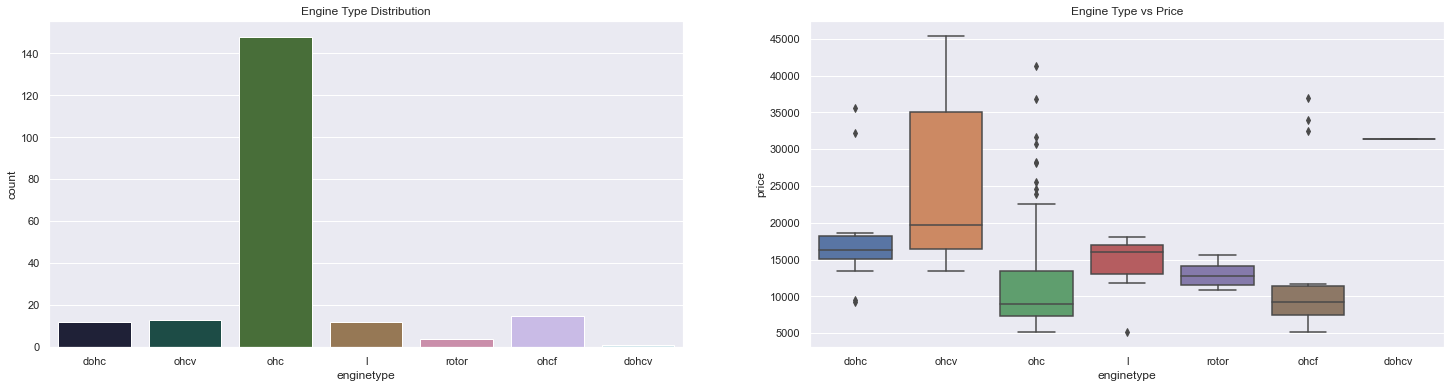

In [20]:
plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
plt.title("Engine Type Distribution")
sns.countplot(cars.enginetype, palette=("cubehelix"))
plt1.set(xlabel = "Engine Type", ylabel = "Frequency Of Engine Type")

plt.subplot(1,2,2)
plt.title("Engine Type vs Price")
sns.boxplot(x = cars.enginetype, y = cars.price)

In [21]:
def plot(xname):
    plt.figure(figsize=(25,8))

    plt.subplot(1,2,1)
    plt.title(f"{xname} Distribution",fontsize=22)
    sns.countplot(cars[xname], palette=("cubehelix"))
    plt.tick_params(labelsize=18)
    plt.xlabel(xname,fontsize=20)
    plt.ylabel(f"Frequency Of {xname}",fontsize=20)
    #plt1.set(xlabel = xname, ylabel = f"Frequency Of {xname}",fontsize=17)

    plt.subplot(1,2,2)
    plt.title(f"{xname} vs Price",fontsize=22)
    sns.boxplot(x = cars[xname], y = cars.price)
    plt.tick_params(labelsize=18)
    plt.xlabel(xname,fontsize=20)
    plt.ylabel("Price",fontsize=20)
    
    plt.show()

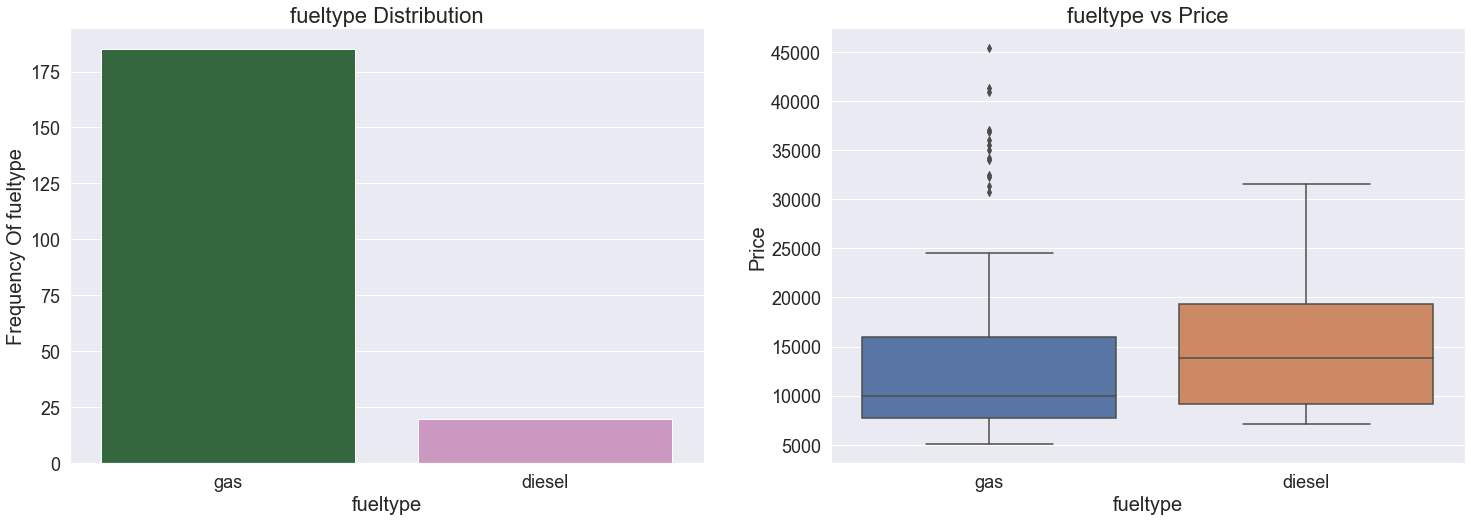

In [22]:
plot("fueltype")

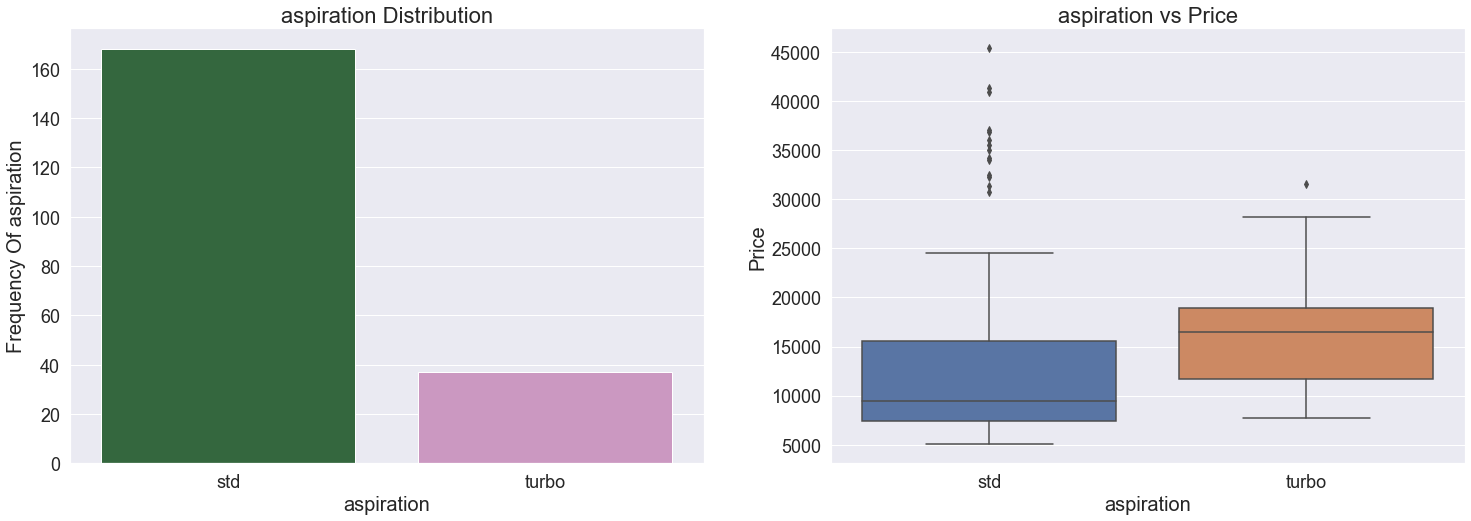

In [23]:
plot("aspiration")

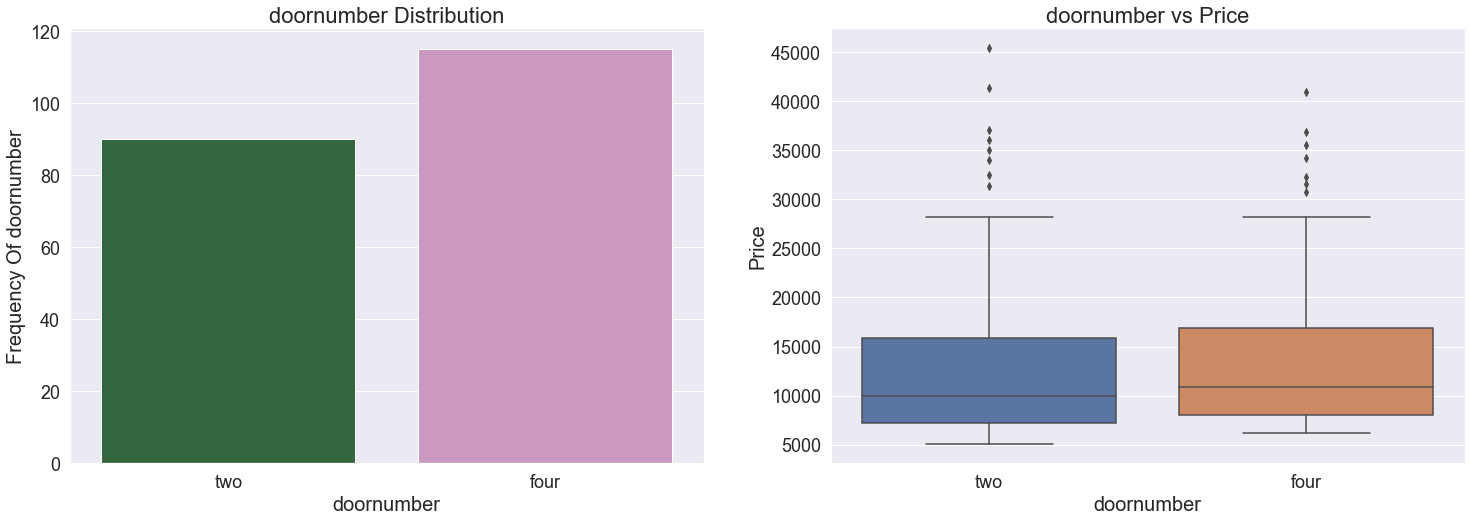

In [24]:
plot("doornumber")

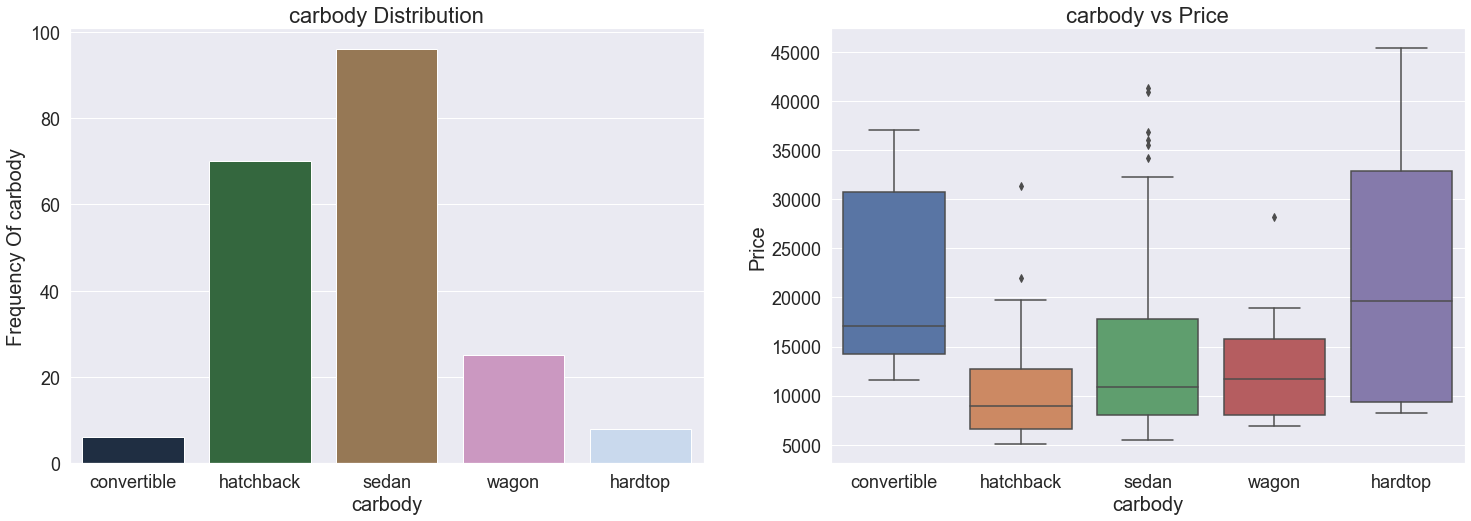

In [25]:
plot("carbody")

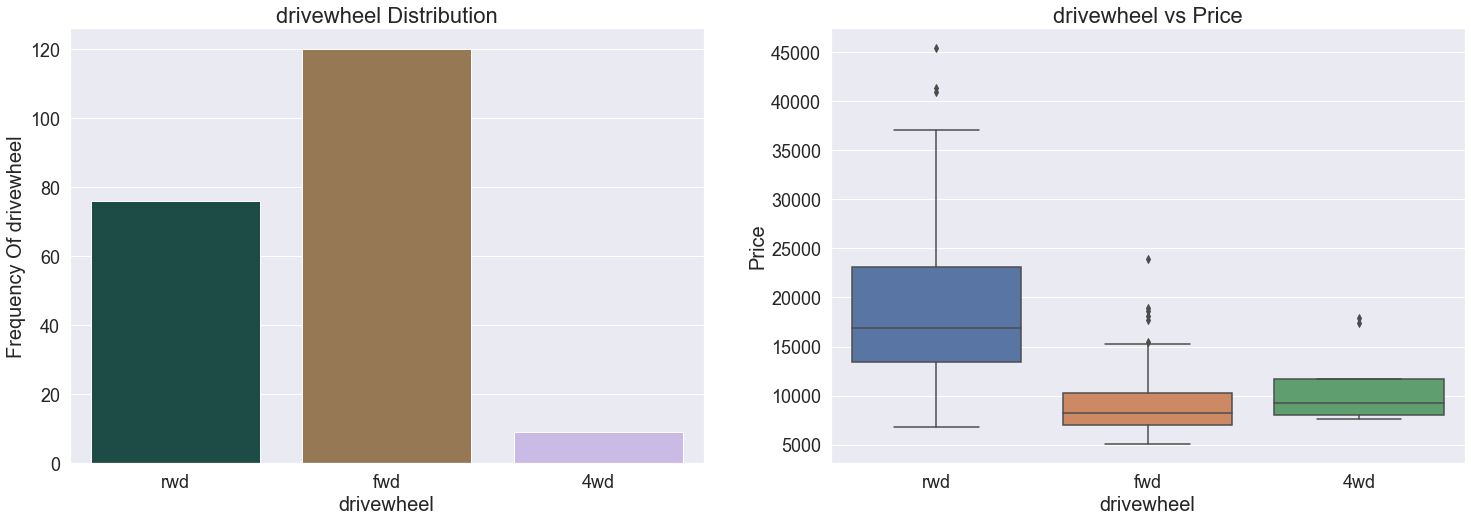

In [26]:
plot("drivewheel")

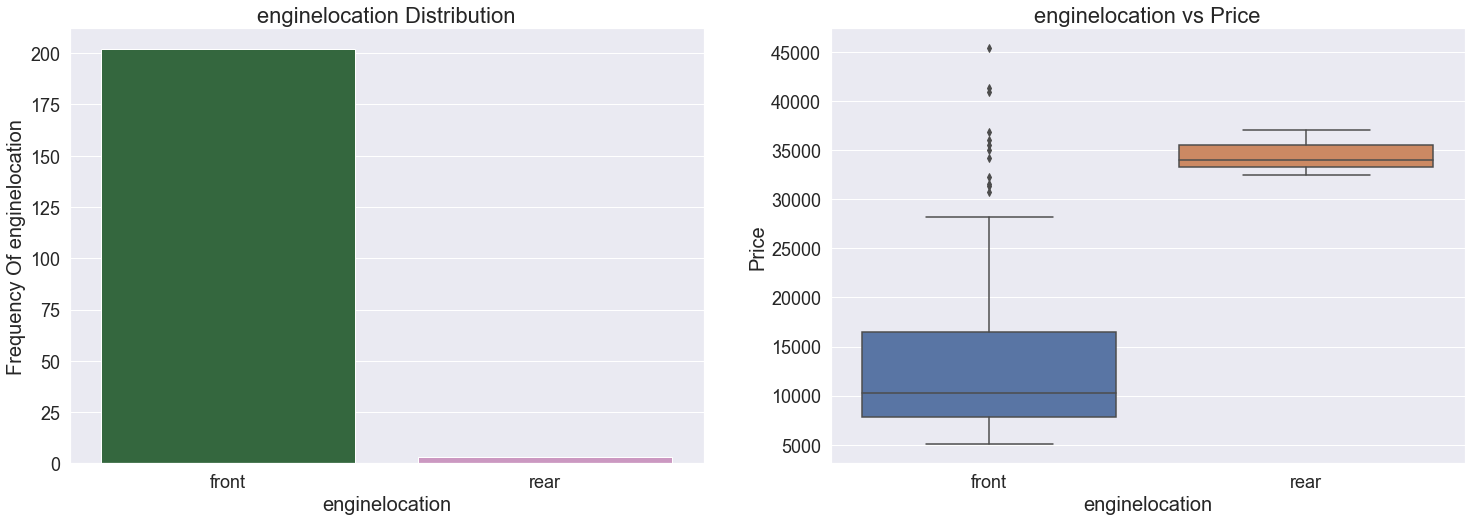

In [27]:
plot("enginelocation")

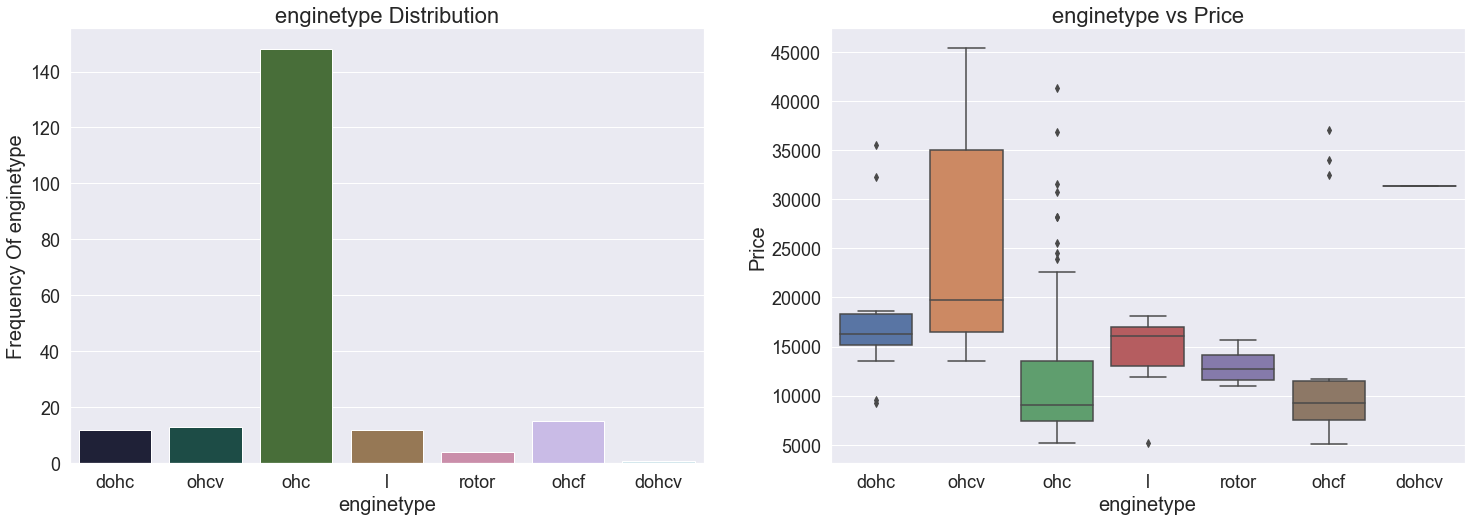

In [28]:
plot("enginetype")

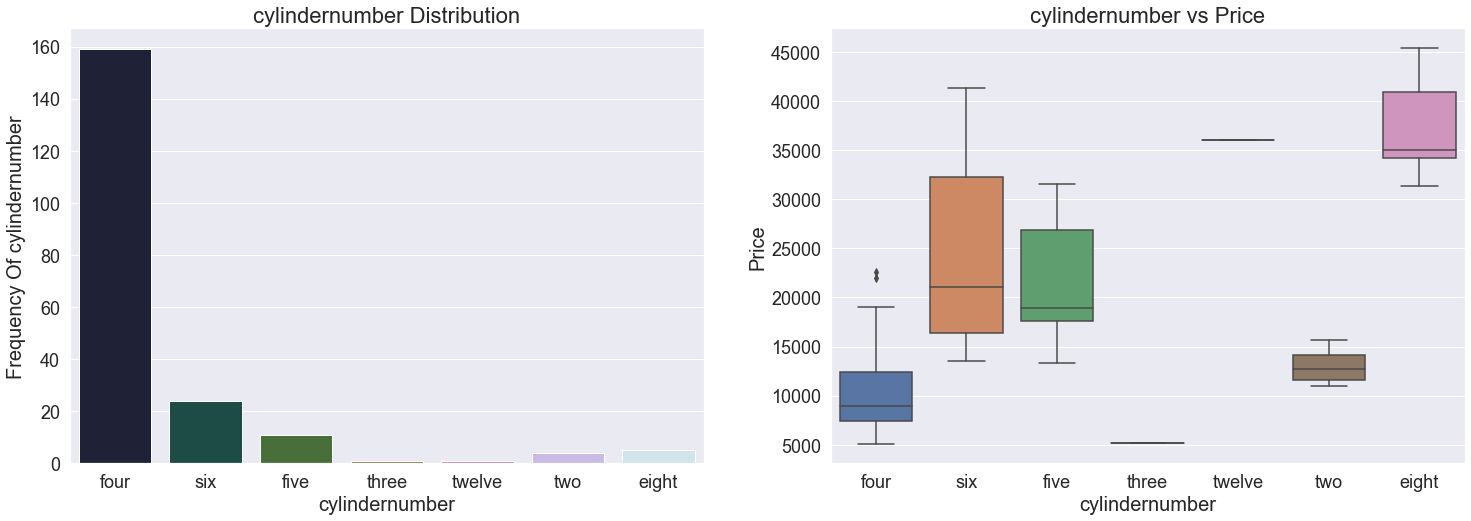

In [29]:
plot("cylindernumber")

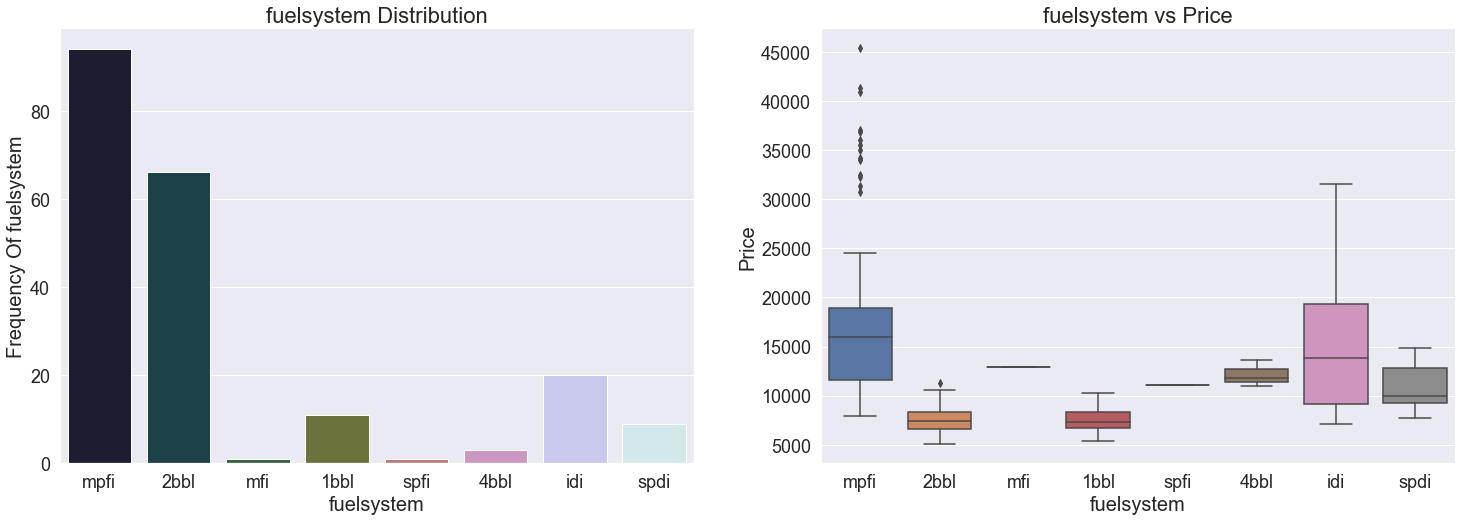

In [30]:
plot("fuelsystem")

In [31]:
def scatter_plot(xname):
    
    plt.figure(figsize=(12,6))

    plt.title(f"{xname} vs Price",fontsize=22)
    sns.scatterplot(x = cars[xname], y = cars.price)
    plt.tick_params(labelsize=12)
    plt.xlabel(xname,fontsize=20)
    plt.ylabel("Price",fontsize=20)
    #plt.tight_layout()
    plt.show()

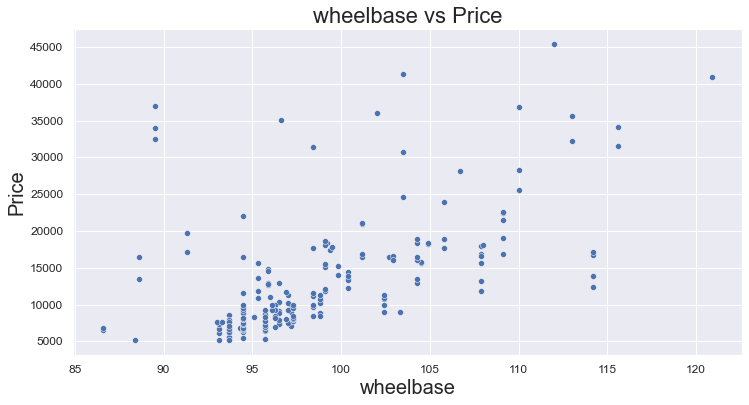

In [32]:
scatter_plot("wheelbase")

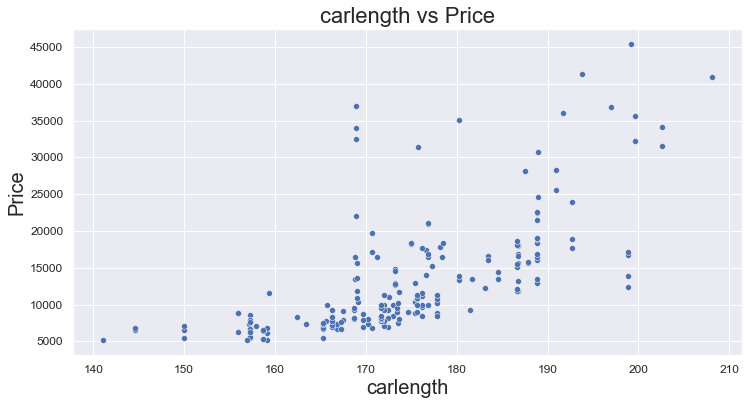

In [33]:
scatter_plot("carlength")

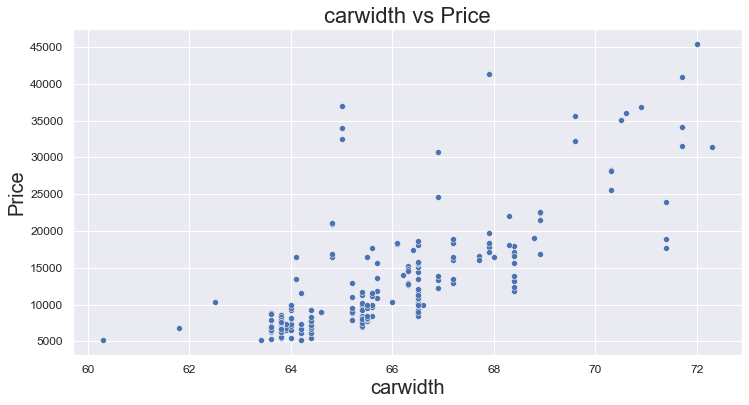

In [34]:
scatter_plot("carwidth")

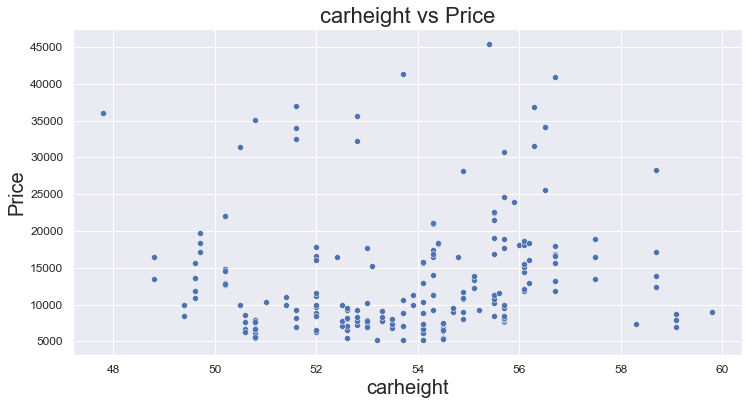

In [35]:
scatter_plot("carheight")

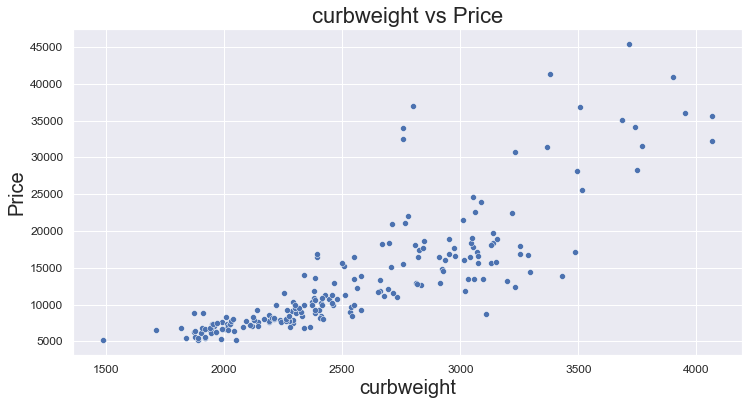

In [36]:
scatter_plot("curbweight")

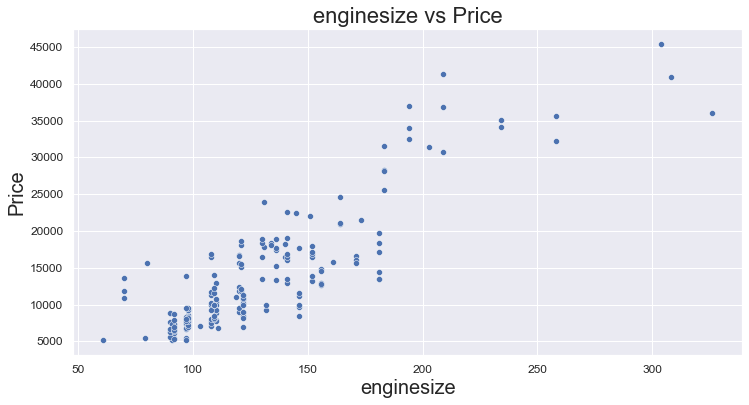

In [37]:
scatter_plot("enginesize")

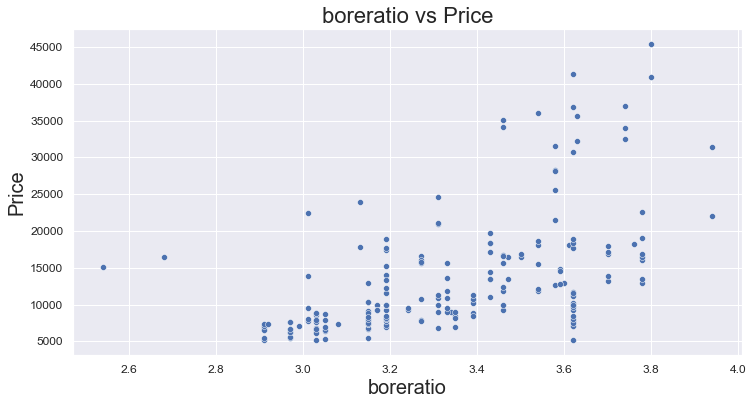

In [38]:
scatter_plot("boreratio")

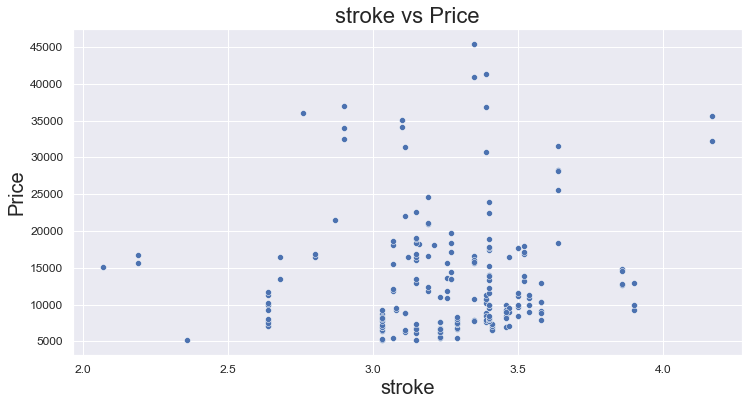

In [39]:
scatter_plot("stroke")

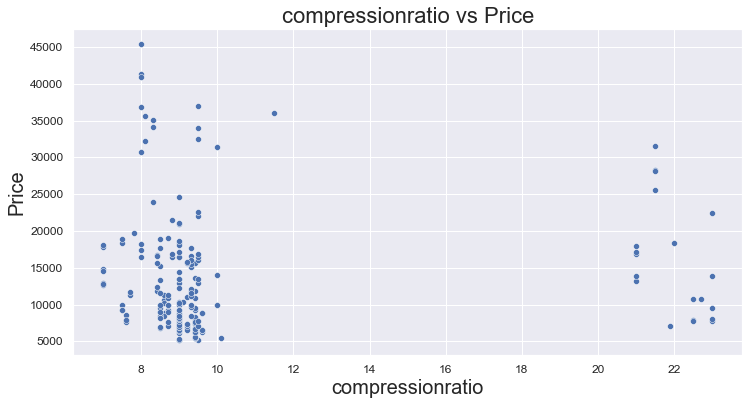

In [40]:
scatter_plot("compressionratio")

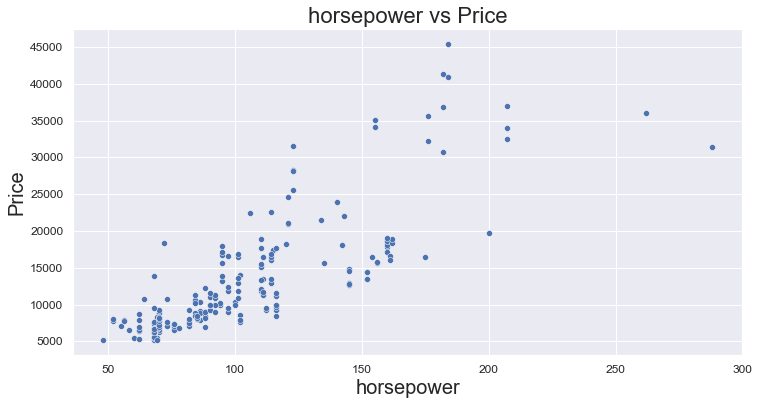

In [41]:
scatter_plot("horsepower")

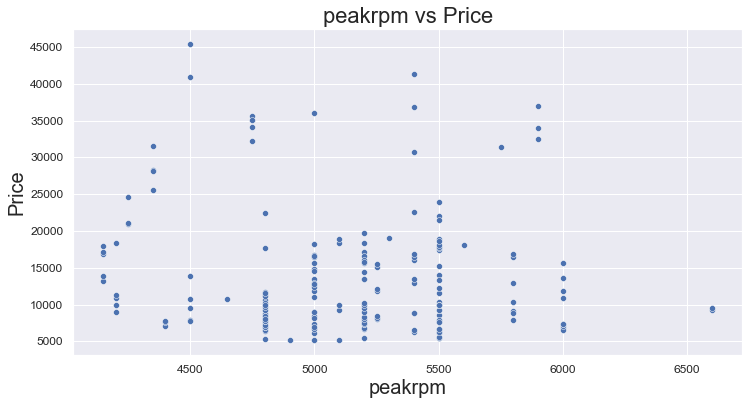

In [42]:
scatter_plot("peakrpm")

In [43]:
mpg = cars["citympg"]*.7+cars["highwaympg"]*.3

cars.insert(25,"Fuel Economy",mpg,True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Fuel Economy,price
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,22.800,"13,495.000"
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,22.800,"16,500.000"
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,21.100,"16,500.000"
3,4,2,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,25.800,"13,950.000"
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,19.200,"17,450.000"


In [44]:
# changing mpg to kml
# for an approximate result, divide the fuel economy value by 2.352


cars["Fuel Economy"] = cars["Fuel Economy"]/2.352

In [45]:
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Fuel Economy,price
0,1,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,9.694,"13,495.000"
1,2,3,alfa-romeo,gas,std,two,convertible,rwd,front,88.600,168.800,64.100,48.800,2548,dohc,four,130,mpfi,3.470,2.680,9.000,111,5000,21,27,9.694,"16,500.000"
2,3,1,alfa-romeo,gas,std,two,hatchback,rwd,front,94.500,171.200,65.500,52.400,2823,ohcv,six,152,mpfi,2.680,3.470,9.000,154,5000,19,26,8.971,"16,500.000"
3,4,2,audi,gas,std,four,sedan,fwd,front,99.800,176.600,66.200,54.300,2337,ohc,four,109,mpfi,3.190,3.400,10.000,102,5500,24,30,10.969,"13,950.000"
4,5,2,audi,gas,std,four,sedan,4wd,front,99.400,176.600,66.400,54.300,2824,ohc,five,136,mpfi,3.190,3.400,8.000,115,5500,18,22,8.163,"17,450.000"


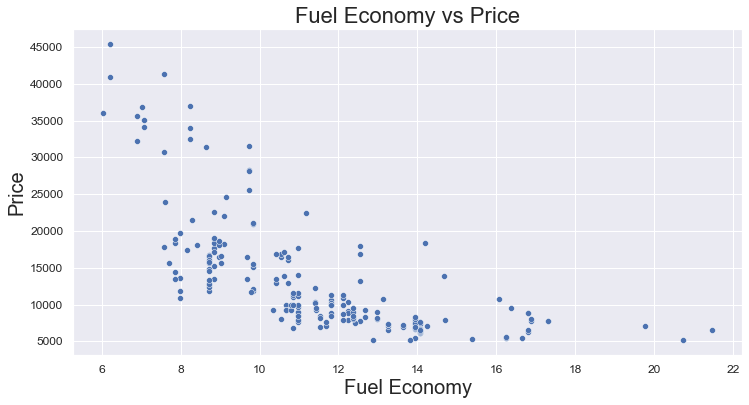

In [46]:
scatter_plot("Fuel Economy")

In [47]:
### MEAN PRICE OF COMPANY

company_price = cars.groupby("CompanyName")["price"].mean().sort_values(ascending = False)
company_price

CompanyName
jaguar       34,600.000
buick        33,647.000
porsche      31,400.500
bmw          26,118.750
volvo        18,063.182
audi         17,859.167
mercury      16,503.000
alfa-romeo   15,498.333
peugeot      15,489.091
saab         15,223.333
mazda        10,652.882
nissan       10,415.667
volkswagen   10,077.500
toyota        9,885.812
renault       9,595.000
mitsubishi    9,239.769
isuzu         8,916.500
subaru        8,541.250
honda         8,184.692
plymouth      7,963.429
dodge         7,875.444
chevrolet     6,007.000
Name: price, dtype: float64

Text(0.5, 1.0, 'Company Name Vs Avg. Price')

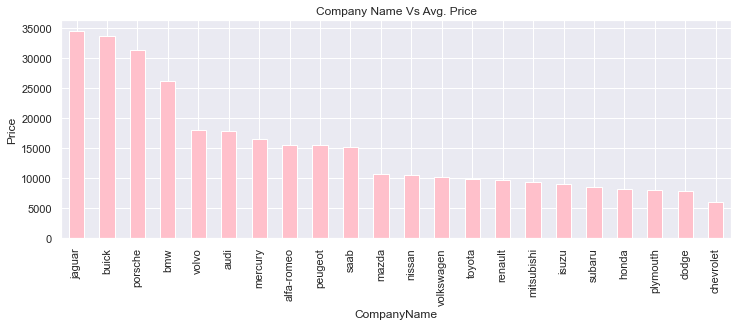

In [48]:
plt.figure(figsize=(12,4))
company_price.plot.bar(color = "pink")
plt.ylabel("Price")
plt.title("Company Name Vs Avg. Price")

In [49]:
### MEAN PRICE OF FULETYPE

fueltype_price = cars.groupby("fueltype")["price"].mean().sort_values(ascending = False)
fueltype_price

fueltype
diesel   15,838.150
gas      12,999.798
Name: price, dtype: float64

Text(0.5, 1.0, 'Fuel Type Vs Avg. Price')

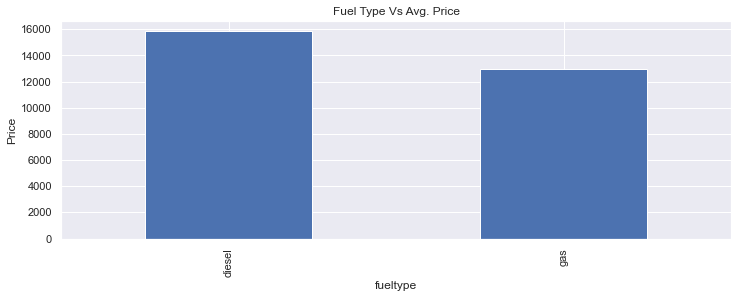

In [50]:
plt.figure(figsize=(12,4))
fueltype_price.plot.bar()
plt.ylabel("Price")
plt.title("Fuel Type Vs Avg. Price")

Text(0.5, 1.0, 'Car Body Vs Avg. Price')

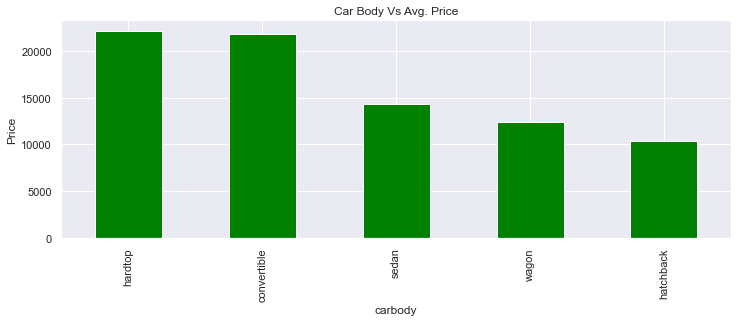

In [51]:
### MEAN PRICE OF CARBODY

fueltype_price = cars.groupby("carbody")["price"].mean().sort_values(ascending = False)
fueltype_price

plt.figure(figsize=(12,4))
fueltype_price.plot.bar(color="green")
plt.ylabel("Price")
plt.title("Car Body Vs Avg. Price")

Text(0.5, 1.0, 'Car Body Vs Avg. Price')

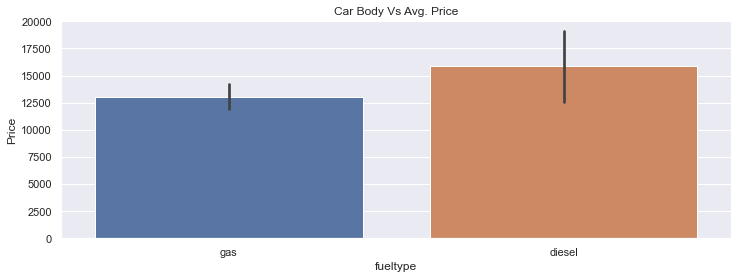

In [52]:
### MEAN PRICE OF CARBODY

#fueltype_price = cars.groupby("carbody")["price"].mean().sort_values(ascending = False)
#fueltype_price

plt.figure(figsize=(12,4))
#fueltype_price.plot.bar(color="green")
sns.barplot(x=cars["fueltype"],y=cars["price"])
plt.ylabel("Price")
plt.title("Car Body Vs Avg. Price")

In [53]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'Fuel Economy', 'price'],
      dtype='object')

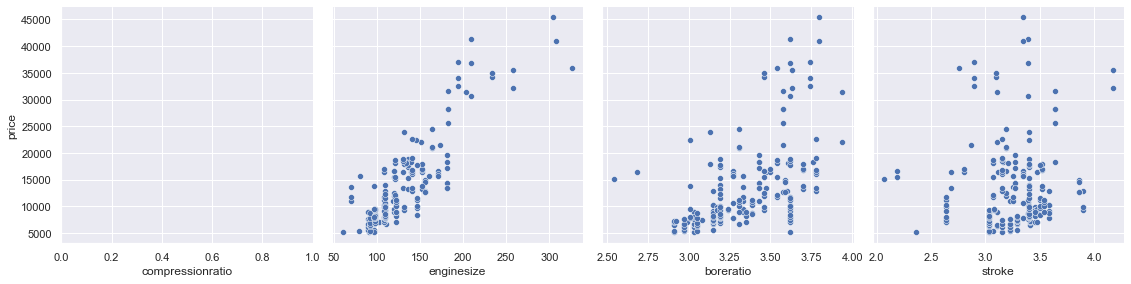

In [55]:
def pp(a,x,y,z):
    sns.pairplot(cars, x_vars=[a,x,y,z], y_vars = "price", size = 4, kind = "scatter")
    plt.show()
    
pp("compressionratio","enginesize","boreratio","stroke")

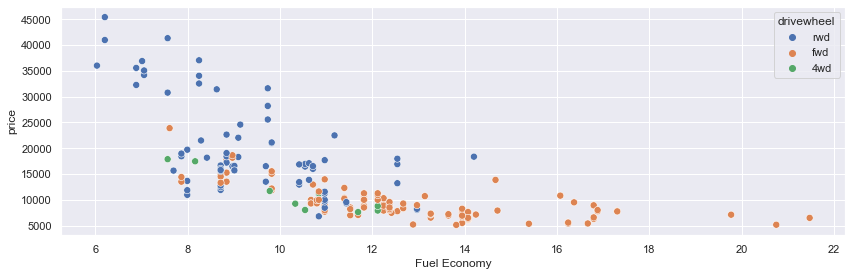

In [56]:
plt.figure(figsize=(12,4))
sns.scatterplot(data=cars,x= cars["Fuel Economy"],y=cars.price,hue=cars["drivewheel"],s = 50)
plt.tight_layout()
plt.show()

In [57]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'Fuel Economy', 'price'],
      dtype='object')

In [57]:
cars_lr = cars[['price','fueltype','aspiration','carbody','drivewheel','wheelbase','curbweight',\
           'enginetype','cylindernumber','enginesize','boreratio','horsepower','Fuel Economy','carlength','carwidth']]

In [58]:
cars_lr.head(5)

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,Fuel Economy,carlength,carwidth
0,"13,495.000",gas,std,convertible,rwd,88.600,2548,dohc,four,130,3.470,111,9.694,168.800,64.100
1,"16,500.000",gas,std,convertible,rwd,88.600,2548,dohc,four,130,3.470,111,9.694,168.800,64.100
2,"16,500.000",gas,std,hatchback,rwd,94.500,2823,ohcv,six,152,2.680,154,8.971,171.200,65.500
3,"13,950.000",gas,std,sedan,fwd,99.800,2337,ohc,four,109,3.190,102,10.969,176.600,66.200
4,"17,450.000",gas,std,sedan,4wd,99.400,2824,ohc,five,136,3.190,115,8.163,176.600,66.400


In [59]:
cars_lr.describe(include = "O")

,fueltype,aspiration,carbody,drivewheel,enginetype,cylindernumber
count,205,205,205,205,205,205
unique,2,2,5,3,7,7
top,gas,std,sedan,fwd,ohc,four
freq,185,168,96,120,148,159


# Feature Engineering

In [60]:
def dummy(col_name,df):
    return pd.get_dummies(data=df,columns=[col_name])

In [61]:
cars_lr = dummy("fueltype",cars_lr)
cars_lr = dummy("aspiration",cars_lr)
cars_lr = dummy("carbody",cars_lr)
cars_lr = dummy("drivewheel",cars_lr)
cars_lr = dummy("enginetype",cars_lr)
cars_lr = dummy("cylindernumber",cars_lr)

cars_lr

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fuel Economy,carlength,carwidth,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,"13,495.000",88.600,2548,130,3.470,111,9.694,168.800,64.100,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,"16,500.000",88.600,2548,130,3.470,111,9.694,168.800,64.100,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,"16,500.000",94.500,2823,152,2.680,154,8.971,171.200,65.500,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,"13,950.000",99.800,2337,109,3.190,102,10.969,176.600,66.200,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,"17,450.000",99.400,2824,136,3.190,115,8.163,176.600,66.400,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,"16,845.000",109.100,2952,141,3.780,114,10.417,188.800,68.900,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
201,"19,045.000",109.100,3049,141,3.780,160,8.844,188.800,68.800,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
202,"21,485.000",109.100,3012,173,3.580,134,8.291,188.800,68.900,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
203,"22,470.000",109.100,3217,145,3.010,106,11.182,188.800,68.900,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [62]:
feature_data = cars_lr.copy()

In [63]:
del feature_data["fueltype_diesel"]
del feature_data["aspiration_turbo"]

# Feature Selection

In [64]:
col = feature_data.corr()["price"][np.abs(feature_data.corr()["price"]) > 0.5]
col

price                  1.000
wheelbase              0.578
curbweight             0.835
enginesize             0.874
boreratio              0.553
horsepower             0.808
Fuel Economy          -0.694
carlength              0.683
carwidth               0.759
drivewheel_fwd        -0.602
drivewheel_rwd         0.639
cylindernumber_four   -0.698
Name: price, dtype: float64

In [65]:
feature_col = col.index
feature_col

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'Fuel Economy', 'carlength', 'carwidth', 'drivewheel_fwd',
       'drivewheel_rwd', 'cylindernumber_four'],
      dtype='object')

In [66]:
feature_data = feature_data[feature_col]

In [67]:
feature_data

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fuel Economy,carlength,carwidth,drivewheel_fwd,drivewheel_rwd,cylindernumber_four
0,"13,495.000",88.600,2548,130,3.470,111,9.694,168.800,64.100,0,1,1
1,"16,500.000",88.600,2548,130,3.470,111,9.694,168.800,64.100,0,1,1
2,"16,500.000",94.500,2823,152,2.680,154,8.971,171.200,65.500,0,1,0
3,"13,950.000",99.800,2337,109,3.190,102,10.969,176.600,66.200,1,0,1
4,"17,450.000",99.400,2824,136,3.190,115,8.163,176.600,66.400,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,"16,845.000",109.100,2952,141,3.780,114,10.417,188.800,68.900,0,1,1
201,"19,045.000",109.100,3049,141,3.780,160,8.844,188.800,68.800,0,1,1
202,"21,485.000",109.100,3012,173,3.580,134,8.291,188.800,68.900,0,1,0
203,"22,470.000",109.100,3217,145,3.010,106,11.182,188.800,68.900,0,1,0


# Machine Learning

In [68]:
## model training libraries

from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [72]:
scalar = MinMaxScaler()
num_vars = feature_data.columns
feature_data[num_vars] = scalar.fit_transform(feature_data[num_vars])
feature_data.head(10)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fuel Economy,carlength,carwidth,drivewheel_fwd,drivewheel_rwd,cylindernumber_four
0,0.208,0.058,0.411,0.260,0.664,0.262,0.237,0.413,0.317,0.000,1.000,1.000
1,0.283,0.058,0.411,0.260,0.664,0.262,0.237,0.413,0.317,0.000,1.000,1.000
2,0.283,0.230,0.518,0.343,0.100,0.442,0.190,0.449,0.433,0.000,1.000,0.000
3,0.219,0.385,0.329,0.181,0.464,0.225,0.320,0.530,0.492,1.000,0.000,1.000
4,0.306,0.373,0.518,0.283,0.464,0.279,0.138,0.530,0.508,0.000,0.000,0.000
5,0.252,0.385,0.395,0.283,0.464,0.258,0.182,0.540,0.500,1.000,0.000,0.000
6,0.313,0.560,0.526,0.283,0.464,0.258,0.182,0.770,0.925,1.000,0.000,0.000
7,0.343,0.560,0.569,0.283,0.464,0.258,0.182,0.770,0.925,1.000,0.000,0.000
8,0.466,0.560,0.620,0.264,0.421,0.383,0.102,0.770,0.925,1.000,0.000,0.000
9,0.316,0.376,0.607,0.264,0.421,0.467,0.099,0.554,0.633,0.000,0.000,0.000


In [73]:
feature_data["price"] = cars["price"]
feature_data.head(10)

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fuel Economy,carlength,carwidth,drivewheel_fwd,drivewheel_rwd,cylindernumber_four
0,"13,495.000",0.058,0.411,0.260,0.664,0.262,0.237,0.413,0.317,0.000,1.000,1.000
1,"16,500.000",0.058,0.411,0.260,0.664,0.262,0.237,0.413,0.317,0.000,1.000,1.000
2,"16,500.000",0.230,0.518,0.343,0.100,0.442,0.190,0.449,0.433,0.000,1.000,0.000
3,"13,950.000",0.385,0.329,0.181,0.464,0.225,0.320,0.530,0.492,1.000,0.000,1.000
4,"17,450.000",0.373,0.518,0.283,0.464,0.279,0.138,0.530,0.508,0.000,0.000,0.000
5,"15,250.000",0.385,0.395,0.283,0.464,0.258,0.182,0.540,0.500,1.000,0.000,0.000
6,"17,710.000",0.560,0.526,0.283,0.464,0.258,0.182,0.770,0.925,1.000,0.000,0.000
7,"18,920.000",0.560,0.569,0.283,0.464,0.258,0.182,0.770,0.925,1.000,0.000,0.000
8,"23,875.000",0.560,0.620,0.264,0.421,0.383,0.102,0.770,0.925,1.000,0.000,0.000
9,"17,859.167",0.376,0.607,0.264,0.421,0.467,0.099,0.554,0.633,0.000,0.000,0.000


In [74]:
x = feature_data.drop(["price","boreratio","wheelbase"],axis = 1)
y = feature_data["price"]

In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [76]:
print(f"xtrain: {xtrain.shape} \nxtest: {xtest.shape} \nytrain: {ytrain.shape} \nytest: {ytest.shape}")

xtrain: (153, 9) 
xtest: (52, 9) 
ytrain: (153,) 
ytest: (52,)


In [77]:
model = LinearRegression()

In [78]:
model.fit(xtrain,ytrain)

LinearRegression()

In [79]:
print(f"Coefficients : {model.coef_}")
print(f"intercept : {model.intercept_}")

Coefficients : [  922.25398169 17669.92657809 11434.06441608  3417.98813143
   692.51309669  7146.55667657  -694.98072482  2253.42645797
 -3634.43081041]
intercept : 3270.282257852934


In [80]:
y_pred = model.predict(xtest)

In [81]:
pd.DataFrame({"Original Price":ytest,"Predicted Price":y_pred})

,Original Price,Predicted Price
52,"6,795.000","6,331.549"
181,"15,750.000","22,700.140"
5,"15,250.000","15,463.456"
18,"5,151.000","5,833.219"
188,"9,995.000","9,603.019"
170,"11,199.000","15,834.150"
76,"5,389.000","6,983.596"
154,"7,898.000","6,264.187"
104,"17,199.000","24,880.935"
33,"6,529.000","6,399.814"


In [100]:
### MAE : use when we have to ignore outiers from data 
### RMSE : use when we need to include outliers in predictive analysis

In [93]:
print(f"MAE: {metrics.mean_absolute_error(ytest,y_pred)}")

MAE: 2466.43467005479


In [94]:
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(ytest,y_pred))}")

RMSE: 3632.5619124161567


In [96]:
model.score(xtrain,ytrain)

0.8546808124588373